In [1]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib

matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [2]:
df = pd.read_csv('/Users/vokeojuederhie/PycharmProjects/untitled6/timeseries.csv',index_col=[0],parse_dates=True,squeeze=True)
df_data = df.dropna(axis=0)

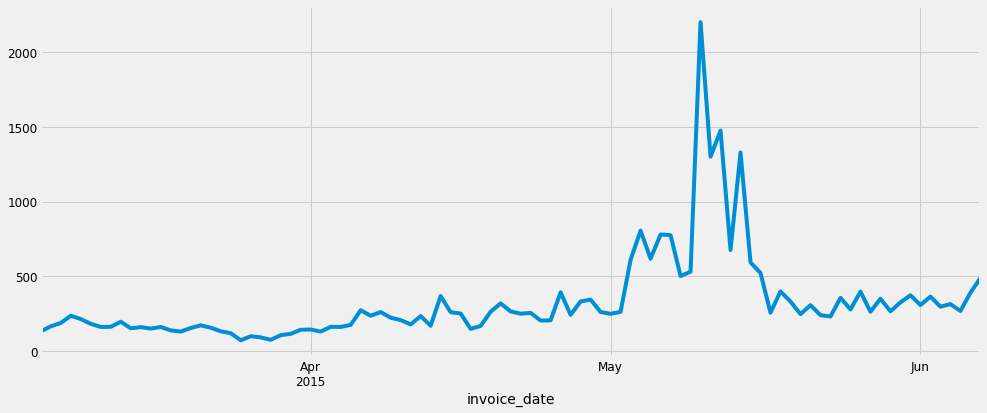

In [3]:
df_data.plot(figsize=(15,6))
plt.show()

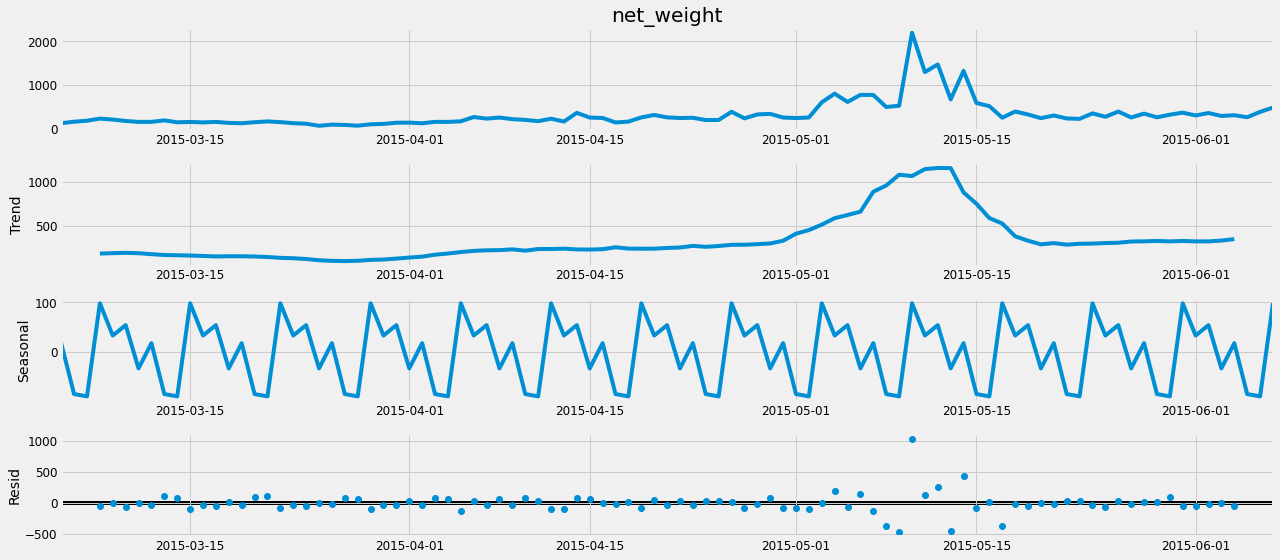

In [4]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8

decomposition = sm.tsa.seasonal_decompose(df_data, model='additive')
fig = decomposition.plot()
plt.show()

In [5]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [6]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(df_data,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

/Users/vokeojuederhie/.conda/envs/untitled6/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/Users/vokeojuederhie/.conda/envs/untitled6/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/Users/vokeojuederhie/.conda/envs/untitled6/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/Users/vokeojuederhie/.conda/envs/untitled6/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/Use

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1419.762561486704
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1235.4086560687385
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:1238.575296447077
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1041.2459181920613
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:1235.3997432165086
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1209.9035337070095
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:1067.20771663415
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:1043.115820566896
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1360.9274706778172
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:1188.6284131682853
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:1203.2013367977952
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:1007.4037088648804
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:1208.2669051778475
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:1174.3936675228258
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:1048.7065176319416
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:1009.336026919946
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:1295.264827300308
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1141.4383250407034

In [7]:
mod = sm.tsa.statespace.SARIMAX(df_data,
                                order=(1, 0, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

/Users/vokeojuederhie/.conda/envs/untitled6/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/Users/vokeojuederhie/.conda/envs/untitled6/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9113      0.049     18.571      0.000       0.815       1.007
ma.L1         -0.4331      0.177     -2.445      0.014      -0.780      -0.086
ar.S.L12      -0.1075      0.200     -0.537      0.591      -0.499       0.285
ma.S.L12      -1.0001      0.063    -15.894      0.000      -1.123      -0.877
sigma2      5.601e+04   1.12e-06   4.99e+10      0.000     5.6e+04     5.6e+04


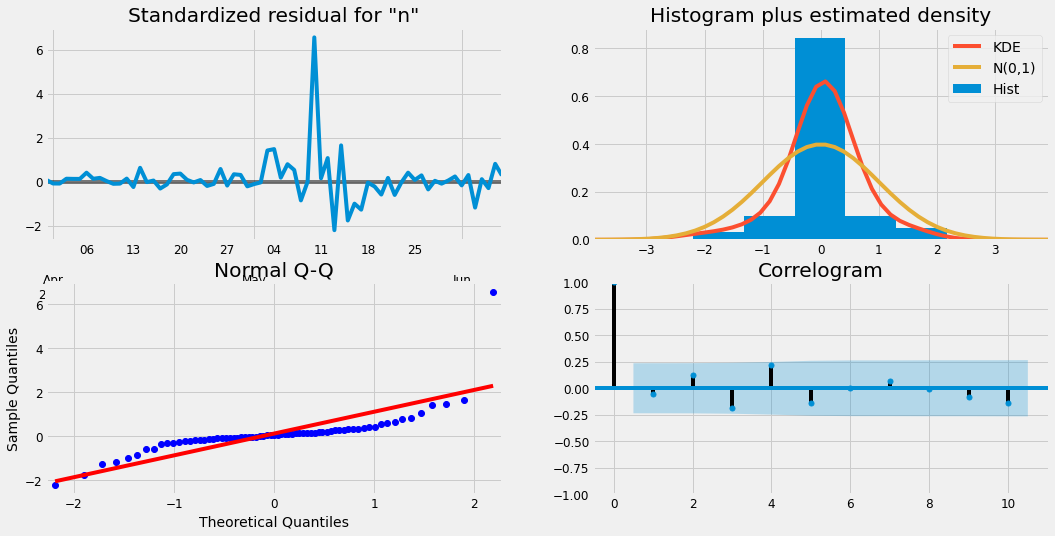

In [8]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

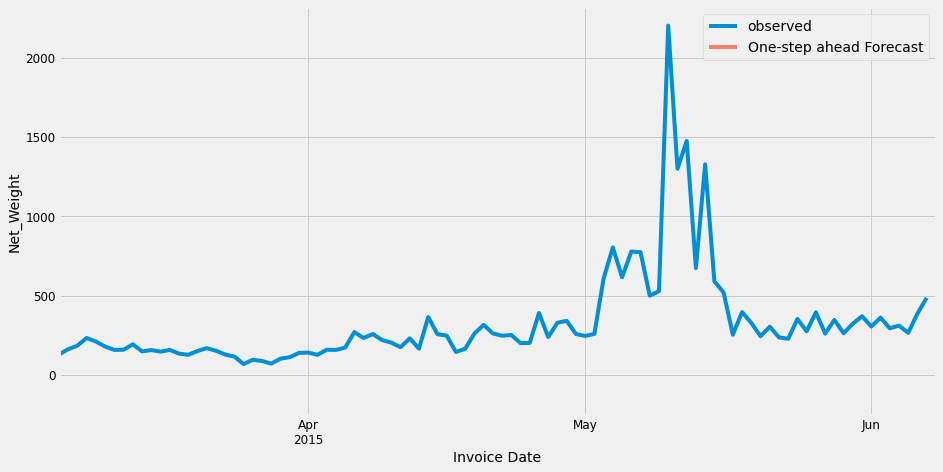

In [10]:
pred = results.get_prediction(start='2015-06-08', dynamic=True)
pred_ci = pred.conf_int()

ax = df_data.plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Invoice Date')
ax.set_ylabel('Net_Weight')
plt.legend()

plt.show()